# **Traffic analysis**

The task is to analyze dataset in order to find useful insights: what segments of data bring traffic with the best quality (Main metric is conversion rate from lead to client. There can be other metrics as well) 


**We are going to answer following questions:**

-How users are distributed over countries?

-How many outliers are there in data (in terms of deposits)?

-Find segments with best conversion rate (client/lead ratio) and explain why you consider them best ones

-Visualize deposits distribution over sources and channels

-What are your advices to marketing team in order to optimize their activity?

**Data** 

We have a synthetic dataset (synthetic_data.csv) that contains history of users' activities (registrations and deposits)

**Data description:** 

client_id - unique id of lead/client. it's assigned during registration and isn't changed anymore 

Country - country of lead/client (iso2). It's in the separate file (countries.csv)

Source - source of traffic acquisition. There are two possible sources (posts and telegram channel). if Source contains "postid" - it means that lead came from article. id of post doesn't matter. if Source contains "telegram" - it means that lead came from telegram  

channel - channel of traffic. For example, user can come from 'telegram' source and from 'affiliate' channel

Clicks - amount of clicks user made during first day after registration

Latency - time of application loading in miliseconds

Depo - amount of deposit, USD



**Glossary:**

Lead: user who registered inside mobile app

Client: user who registered inside mobile app AND made a deposit

In [451]:
#import libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [452]:
# reading data

countries = pd.read_csv('countries.csv')
synthetic_data = pd.read_csv('synthetic_data.csv')

In [453]:
# exploring data

countries.head()

,country,client_id
0,IN,6348826
1,FR,6751691
2,DE,8638448
3,LT,4722696
4,ES,2411132


In [454]:
# checking data shape

countries.shape

(219314, 2)

In [455]:
# checking data types

countries.dtypes

country      object
client_id     int64
dtype: object

In [456]:
# looking for empty cells

countries.isna().sum()

country      0
client_id    0
dtype: int64

In [457]:
# exploring data

synthetic_data.head()

,Unnamed: 0,depo,segment,channel,clicks,latency,client_id
0,0,0,postid_4057,smm,1.0,2.649725,1442498
1,1,0,telegram,affiliate,10.0,2.610846,7865631
2,2,0,postid_8542,facebook,13.0,3.001162,8165584
3,3,0,telegram,direct,0.0,1.788369,5893056
4,4,0,telegram,smm,0.0,1.932069,3780924


In [458]:
# checking data shape

synthetic_data.shape

(219314, 7)

In [459]:
# checking data types

synthetic_data.dtypes

Unnamed: 0      int64
depo            int64
segment        object
channel        object
clicks        float64
latency       float64
client_id       int64
dtype: object

In [460]:
# looking for empty cells

synthetic_data.isna().sum()

Unnamed: 0       0
depo             0
segment          0
channel       2172
clicks           0
latency          0
client_id        0
dtype: int64

We can see that there are 2172 values missing at channel column. Let's replace empty cells with 'none' value.

In [474]:
synthetic_data['channel'] = synthetic_data['channel'].fillna('none')


In [471]:
synthetic_data.isna().sum()

Unnamed: 0    0
depo          0
segment       0
channel       0
clicks        0
latency       0
client_id     0
dtype: int64

In [475]:
# let's merge the dataframes

general_df = synthetic_data.merge(countries, on='client_id')

In [476]:
# lets's see what we have in general

general_df

,Unnamed: 0,depo,segment,channel,clicks,latency,client_id,country
0,0,0,postid_4057,smm,1.0,2.649725,1442498,IT
1,0,0,postid_4057,smm,1.0,2.649725,1442498,IT
2,1,0,telegram,affiliate,10.0,2.610846,7865631,LU
3,1,0,telegram,affiliate,10.0,2.610846,7865631,LU
4,2,0,postid_8542,facebook,13.0,3.001162,8165584,MO
...,...,...,...,...,...,...,...,...
219309,157555,0,telegram,smm,29.0,1.699514,5942604,ES
219310,157556,0,telegram,social media,0.0,1.803509,1391815,IN
219311,157557,0,postid_4873,facebook,2.0,1.801382,3967839,IN
219312,157558,0,postid_2733,facebook,0.0,3.846842,7962805,US


In [477]:
# checking data shape

general_df.shape

(219314, 8)

In [478]:
# how many unique users we have?

general_df.client_id.nunique()

157560

There are two possible sources (posts and telegram channel). If segment column contains "postid" - it means that lead came from article. id of post doesn't matter. If it contains "telegram" - it means that lead came from telegram. Since we have many different post ids, let's generalize the source in separate column named 'source'.

In [479]:
# adding column with source of traffic acquisition

general_df['source'] = general_df.segment.apply(lambda x: 'telegram' if x == 'telegram' else 'post')
       

We also want to know if the lead became a client (means made a deposit). Let's make an additional column 'convereted' which gets the 'True' value for clients.

In [480]:
# adding column 'converted'

general_df['converted'] = general_df.depo.apply(lambda x: True if x != 0 else False)

In [481]:
# check what we have now

general_df

,Unnamed: 0,depo,segment,channel,clicks,latency,client_id,country,source,converted
0,0,0,postid_4057,smm,1.0,2.649725,1442498,IT,post,False
1,0,0,postid_4057,smm,1.0,2.649725,1442498,IT,post,False
2,1,0,telegram,affiliate,10.0,2.610846,7865631,LU,telegram,False
3,1,0,telegram,affiliate,10.0,2.610846,7865631,LU,telegram,False
4,2,0,postid_8542,facebook,13.0,3.001162,8165584,MO,post,False
...,...,...,...,...,...,...,...,...,...,...
219309,157555,0,telegram,smm,29.0,1.699514,5942604,ES,telegram,False
219310,157556,0,telegram,social media,0.0,1.803509,1391815,IN,telegram,False
219311,157557,0,postid_4873,facebook,2.0,1.801382,3967839,IN,post,False
219312,157558,0,postid_2733,facebook,0.0,3.846842,7962805,US,post,False


In [482]:
general_df.describe(include = "all")

,Unnamed: 0,depo,segment,channel,clicks,latency,client_id,country,source,converted
count,219314.000000,219314.000000,219314,219314,219314.000000,219314.000000,2.193140e+05,219314,219314,219314
unique,NaN,NaN,9801,6,NaN,NaN,NaN,11,2,2
top,NaN,NaN,telegram,facebook,NaN,NaN,NaN,DE,post,False
freq,NaN,NaN,61940,76517,NaN,NaN,NaN,20202,157374,209281
mean,65291.068518,21.349207,NaN,NaN,11.428190,3.022827,4.992632e+06,NaN,NaN,NaN
std,45165.661814,368.334720,NaN,NaN,12.627812,1.047155,2.310152e+06,NaN,NaN,NaN
min,0.000000,-164.000000,NaN,NaN,0.000000,0.000071,1.000126e+06,NaN,NaN,NaN
25%,27414.000000,0.000000,NaN,NaN,0.000000,2.323893,2.989190e+06,NaN,NaN,NaN
50%,54828.000000,0.000000,NaN,NaN,8.000000,3.004932,4.987345e+06,NaN,NaN,NaN
75%,102730.750000,0.000000,NaN,NaN,19.000000,3.691859,6.994740e+06,NaN,NaN,NaN


In [483]:
print(general_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219314 entries, 0 to 219313
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  219314 non-null  int64  
 1   depo        219314 non-null  int64  
 2   segment     219314 non-null  object 
 3   channel     219314 non-null  object 
 4   clicks      219314 non-null  float64
 5   latency     219314 non-null  float64
 6   client_id   219314 non-null  int64  
 7   country     219314 non-null  object 
 8   source      219314 non-null  object 
 9   converted   219314 non-null  bool   
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 16.9+ MB
None


In [484]:
# let's answer the question how users (leads) are distributed over countries? 
general_df \
        .groupby('country', as_index = False)\
        ['client_id'].nunique() \
        .sort_values('client_id', ascending=False)

,country,client_id
0,DE,14504
1,ES,14443
9,US,14427
4,IS,14407
10,VN,14374
6,LT,14341
2,FR,14292
8,MO,14226
3,IN,14215
5,IT,14211


No vizualization needed to see that users are distributed evenly.

In [485]:
# let's answer the question how clients are distributed over countries? 

general_df.query('converted == True') \
          .groupby('country', as_index = False)\
          ['client_id'].nunique() \
          .sort_values('client_id', ascending=False)

,country,client_id
4,IS,691
0,DE,680
3,IN,678
10,VN,674
9,US,667
1,ES,661
6,LT,655
5,IT,653
7,LU,650
2,FR,627


Clients are also distributed evenly.

Clicks - amount of clicks user made during first day after registration.
Latency - time of application loading in miliseconds.
Let's check if these factors have correlation with conversion. 

In [489]:
general_df.query('converted == False') \
          .groupby('latency', as_index = False)\
          ['client_id'].nunique() \
          .sort_values('latency', ascending=False) \
          .max()

latency        7.971682
client_id    215.000000
dtype: float64

In [490]:
general_df.query('converted == True') \
          .groupby('latency', as_index = False)\
          ['client_id'].nunique() \
          .sort_values('latency', ascending=False) \
          .max()

latency       11.016521
client_id    175.000000
dtype: float64

Latency is higher for clients. As we can see it doesn't affect the conversion.

In [491]:
general_df.query('converted == False') \
          .groupby('clicks', as_index = False) \
          ['client_id'].nunique() \
          .sort_values('clicks', ascending=False) \
          .max()

clicks          50.0
client_id    51710.0
dtype: float64

In [492]:
general_df.query('converted == True') \
          .groupby('clicks', as_index = False) \
          ['client_id'].nunique() \
          .sort_values('clicks', ascending=False) \
          .max()

clicks         50.0
client_id    2504.0
dtype: float64

Clicks count are same for both leads and clients, it doesn't affect the conversion.

Now let's check how many outliers are there in data (in terms of deposits). Since we are checking only clients (who made a deposit), let's create a separate dataframe with clients only for our convenience. Then we are going to check 25th and 75th percentiles marking the middle boundaries.

In [494]:
# Let's create a separate dataframe with clients only and check its describtion.

clients = general_df.query('depo != 0')
clients['depo'].describe().round(2)

count    10033.00
mean       466.68
std       1660.75
min       -164.00
25%        211.00
50%        321.00
75%        428.00
max      29527.00
Name: depo, dtype: float64

In [495]:
# double-check our clients count 

general_df.query('converted == True').shape

(10033, 10)

In [496]:
# What is the total depo amount for outliers and what part do they take in total amount.

total_depo = clients.depo.sum()
outliers_depo = clients.query('depo < -114.5' and 'depo > 753.5').agg({'depo': 'sum'})
outliers_vs_total_depo = round(outliers_depo / total_depo * 100, 2)

print(total_depo)
print(outliers_depo)
print(outliers_vs_total_depo)

4682180
depo    1522378
dtype: int64
depo    32.51
dtype: float64


Total depo amount is USD 4 682 180.
Total depo amount for outliers is USD 1 522 378.
32.51 % of total depo are outliers.

<AxesSubplot:xlabel='depo'>

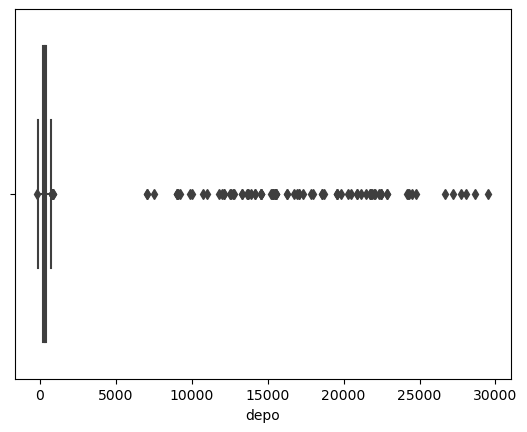

In [497]:
# let's vizualize outliers

sns.boxplot(x=clients['depo'])

In [498]:
# How many outliers are there in data (in terms of deposits)? We will use Tukey’s rule to calculate.

Q1 = clients.depo.quantile(0.25)
Q3 = clients.depo.quantile(0.75)
IQR = Q3 - Q1

((clients.depo < (Q1 - 1.5 * IQR)) | (clients.depo > (Q3 + 1.5 * IQR))).sum()

98

In [499]:
print(Q1 - 1.5 * IQR)
print(Q3 + 1.5 * IQR)

-114.5
753.5


As we can see our outliers lie beyond -114.5 and 753.5 depos. Let's check where they came from.

In [500]:
# Where are these outliers?

clients.query('depo < -114.5' and 'depo > 753.5') \
       .groupby(['channel', 'source', 'country'], as_index = False)  \
       .agg({'depo': 'count'}) \
       .sort_values('depo', ascending=False)

,channel,source,country,depo
9,facebook,post,ES,7
17,facebook,post,US,6
14,facebook,post,LT,5
18,facebook,post,VN,5
32,smm,telegram,DE,4
31,smm,post,VN,4
42,social media,telegram,LT,4
11,facebook,post,IN,4
23,smm,post,ES,3
5,direct,post,MO,3


<AxesSubplot:xlabel='channel', ylabel='depo'>

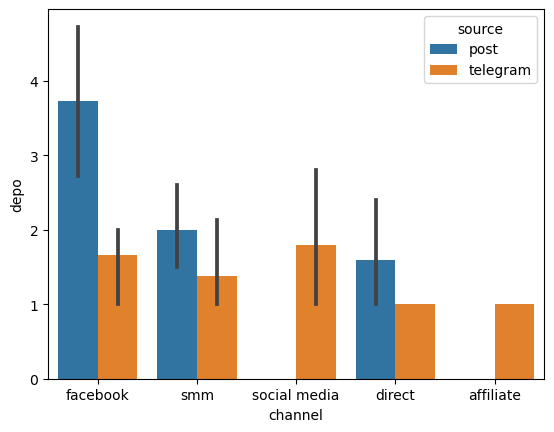

In [503]:
# Visualize outliers distribution over sources and channels

outliers_depo_distribution = clients.query('depo < -114.5' and 'depo > 753.5') \
       .groupby(['channel', 'source', 'country'], as_index = False)  \
       .agg({'depo': 'count'}) \
       .sort_values('depo', ascending=False)

sns.barplot(x=outliers_depo_distribution.channel, y=outliers_depo_distribution.depo, hue=outliers_depo_distribution.source)

As we can see Facebook publications (source 'post') bring most outliers. 

<AxesSubplot:xlabel='channel', ylabel='depo'>

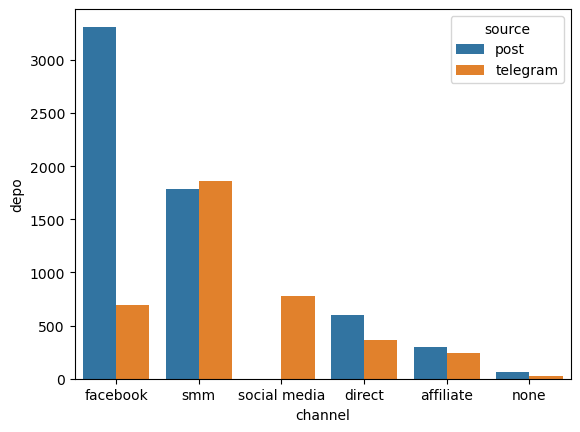

In [504]:
# Let's check total deposits distribution over sources and channels

deposits_distribution = clients \
                               .groupby(['channel', 'source'], as_index = False)  \
                               .agg({'depo': 'count'}) \
                               .sort_values('depo', ascending=False)

sns.barplot(x=deposits_distribution.channel, y=deposits_distribution.depo, hue=deposits_distribution.source)

<AxesSubplot:xlabel='channel', ylabel='depo'>

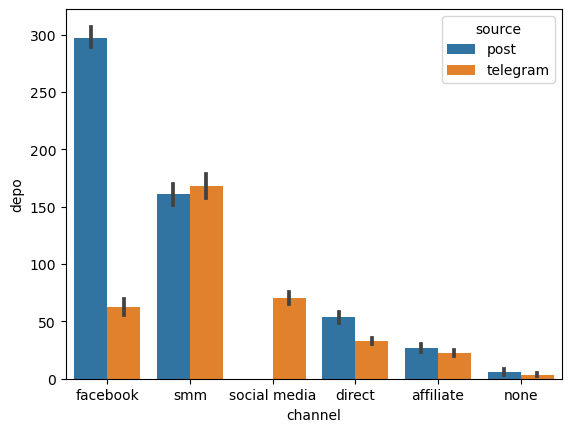

In [505]:
# Check deposits (without outliers) distribution over sources and channels

no_outliers_depo_distribution = clients.query('depo > -114.5' and 'depo < 753.5') \
       .groupby(['channel', 'source', 'country'], as_index = False)  \
       .agg({'depo': 'count'}) \
       .sort_values('depo', ascending=False)

sns.barplot(x=no_outliers_depo_distribution.channel, y=no_outliers_depo_distribution.depo, hue=no_outliers_depo_distribution.source)

As we can see Facebook publications (source 'post') bring most deposits. 

Now we are going to find segments with best conversion rate (client/lead ratio) and explain why they are the best ones

In [506]:
# Let's calculate the total conversion rate

total_leads = general_df['client_id'].nunique()
total_clients = clients['client_id'].nunique()
conversion_rate = total_clients/total_leads
print(round(conversion_rate*100, 2), "%")


4.61 %


In [533]:
# Let's check how many leads we got from different chanels

leads_per_source = general_df \
        .groupby(['channel', 'source'], as_index = False) \
                ['client_id'].nunique() \
                .rename(columns={'client_id': 'lead_count'})
print(leads_per_source)

         channel    source  lead_count
0      affiliate      post        5560
1      affiliate  telegram        2252
2         direct      post       11266
3         direct  telegram        4359
4       facebook      post       40084
5       facebook  telegram       14945
6           none      post        1151
7           none  telegram         447
8            smm      post       33681
9            smm  telegram       13678
10  social media      post       21417
11  social media  telegram        8720


In [534]:
# Let's check how many clients we got from different chanels

clients_per_source = clients \
        .groupby(['channel', 'source'], as_index = False)\
         ['client_id'].nunique() \
        .rename(columns={'client_id': 'client_count'})
print(clients_per_source)

         channel    source  client_count
0      affiliate      post           217
1      affiliate  telegram           175
2         direct      post           434
3         direct  telegram           270
4       facebook      post          2378
5       facebook  telegram           508
6           none      post            46
7           none  telegram            22
8            smm      post          1296
9            smm  telegram          1347
10  social media  telegram           564


In [535]:
conversion_per_source = leads_per_source.merge(clients_per_source)
conversion_per_source['conversion_rate'] = (conversion_per_source.client_count / conversion_per_source.lead_count * 100).round(2)

print(conversion_per_source.sort_values('conversion_rate', ascending=False))

         channel    source  lead_count  client_count  conversion_rate
9            smm  telegram       13678          1347             9.85
1      affiliate  telegram        2252           175             7.77
10  social media  telegram        8720           564             6.47
3         direct  telegram        4359           270             6.19
4       facebook      post       40084          2378             5.93
7           none  telegram         447            22             4.92
6           none      post        1151            46             4.00
0      affiliate      post        5560           217             3.90
2         direct      post       11266           434             3.85
8            smm      post       33681          1296             3.85
5       facebook  telegram       14945           508             3.40


In [536]:
mean_conversion = conversion_per_source.conversion_rate.mean()
print(mean_conversion)

5.466363636363637


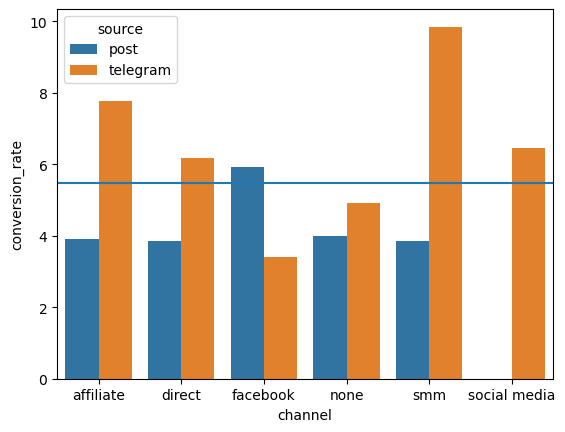

In [537]:
sns.barplot(x=conversion_per_source.channel, y=conversion_per_source.conversion_rate, hue=conversion_per_source.source).axhline(mean_conversion) 

SMM (source 'telegram') brings the highest conversion and Facebook (source 'telegram') brings the lowest. Telegram as a source has the highest conversion rate (above the mean).

Let's check loyal clients, who made more than one depo.

In [515]:
# loyalty

success_number = clients \
                     .groupby('client_id', as_index=False) \
                     .agg({'depo': 'count'}) \
                     .rename(columns={'depo': 'success_number'}) \
                     .sort_values('success_number', ascending=False)

print(success_number)

      client_id  success_number
0       1001913               2
3735    5092658               2
3705    5056333               2
3707    5057099               2
3711    5061256               2
...         ...             ...
3885    5252745               1
3884    5251387               1
3883    5250280               1
3882    5249377               1
4627    6095577               1

[7257 rows x 2 columns]


In [516]:
maximum_success = success_number.success_number.max()
print(maximum_success)

2


In [532]:
successful_clients = success_number.query('success_number == @maximum_success') \
              .sort_values('client_id') \
              .client_id \
              .tolist()

In [518]:
len(successful_clients)

2776

Maximum depos per client is 2. Above we've created the list of loyal clients, who made more than one depo. The list contains 2776 ids and we recommend to pay additional attention to this loyal clients to increase retention rate.

** CONCLUSIONS**

**-How users are distributed over countries?**

Users and clients are distributed evenly, hence location doesn't affaect the conversion rate. 

**-How many outliers are there in data (in terms of deposits)?**

We have 98 depo outliers, which are 32.51 % of total depo amount. Outliers lie beyond -114.5 and 753.5 depos. Facebook publications (source 'post') bring most outliers. 

**-Find segments with best conversion rate (client/lead ratio) and explain why you consider them best ones**
SMM (source 'telegram') brings the highest conversion and Facebook (source 'telegram') brings the lowest. Telegram as a source has the highest conversion rate (most above the mean conversion rate). 

**-Visualize deposits distribution over sources and channels**
<img src="image.png">

**-What are your advices to marketing team in order to optimize their activity?**
1. Posts work well only with Facebook. We recommend to analyze this source deeply as well as other segments with low conversion rate.
2. Maximum depos per client is 2. Above we've created the list of loyal clients, who made more than one depo. The list contains 2776 ids and we recommend to pay additional attention to this loyal clients to increase retention rate.
3. As far as Telegram has the highest conversion rate, we recommend to focus on this source. 

